# Module 11: Inferential Statistics

Statistical inference is the process of using a sample to *infer* the characteristics of an underlying population (from which this sample was drawn) through estimation and hypothesis testing. Contrast this with descriptive statistics, which focus simply on describing the characteristics of the sample itself.

Common goals of inferential statistics include:

  - parameter estimation and confidence intervals
  - hypothesis rejection
  - prediction
  - model selection

Throughout, we will utilize the "frequentist" statistical paradigm:
    
  - frequentists think of probability as proportion of time some outcome occurs (relative frequency)
  - given lots of repeated trials, how likely is the observed outcome?
  - central concepts: statistical hypothesis testing, *p*-values, confidence intervals

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')
sns.set_context('paper') 

np.random.seed(0) #consistent randomization

In [2]:
# load the CA tracts census data
tracts = pd.read_csv('../../data/census_tracts_data_ca.csv', dtype={'GEOID10':str}).set_index('GEOID10')
tracts.shape

(8057, 27)

In [3]:
tracts.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
GEOID10,,,,,,,,,,,,,,,,,,,,,
06001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,4.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
06001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,4.8,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
06001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,5.9,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda
06001450752,5854.0,38.4,8.0,22.7,4.3,3514.0,51.2,80.5,1008600.0,7.8,...,60.1,1.4,15.9,94.5,65.7,44.2,44.5,6,1,Alameda
06001450751,8963.0,36.7,4.8,22.4,1.2,6020.0,48.7,77.4,922500.0,6.6,...,59.3,2.7,10.9,78.8,78.4,35.8,50.1,6,1,Alameda


## 1. Standardization and *z*-scores

In [4]:
# create variable x of the tracts' median age column
x = tracts['median_age'].dropna()
x.describe()

count    8010.000000
mean       37.685381
std         7.802376
min        16.500000
25%        32.200000
50%        36.600000
75%        42.400000
max        78.200000
Name: median_age, dtype: float64

In [5]:
# raw data
x.head()

GEOID10
06001437701    29.4
06001437102    36.6
06001437101    40.2
06001450752    38.4
06001450751    36.7
Name: median_age, dtype: float64

In [6]:
# calculate z-scores (i.e., standardize the median age raw data)
x_stdrd = (x - x.mean()) / x.std()
x_stdrd.head()

GEOID10
06001437701   -1.061905
06001437102   -0.139109
06001437101    0.322289
06001450752    0.091590
06001450751   -0.126292
Name: median_age, dtype: float64

## 2. Central limit theorem and standard errors

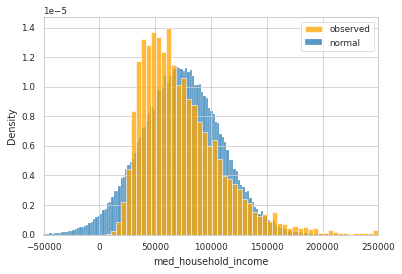

In [7]:
# median household income is not normally distributed
pop = tracts['med_household_income'].dropna()
ax = sns.histplot(pop, stat='density', label='observed', color='orange')
ax.set_xlim(-50000, 250000)

# simulate random normally-distributed data with the same mean and std
normal = np.random.normal(loc=pop.mean(), scale=pop.std(), size=100000)
ax = sns.histplot(normal, stat='density', label='normal', zorder=-1)
l = ax.legend()

In [8]:
# draw 1 simple random sample (of size n) and calculate its mean
n = 100 #sample size
sample = pop.sample(n)
sample.mean()

72648.72

In [9]:
# simulate the CLT: draw 200 random samples and calculate their means
num_of_samples = 200
sample_means = []
for i in range(num_of_samples):
    sample = pop.sample(n)
    sample_means.append(sample.mean())

# the sample mean is different every time, due to randomness
sample_means[0:5]

[71752.08, 82727.03, 81590.01, 69639.26, 73337.84]

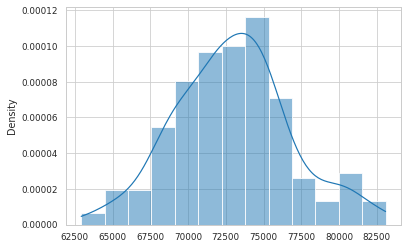

In [10]:
# plot the distribution of all the sample means we calculated
ax = sns.histplot(sample_means, stat='density', kde=True)

In [11]:
# now it's your turn
# experiment with different numbers of samples and different sample sizes above
# what happens to our curve?


The plot above visualizes the (simulated) **sampling distribution** of the mean. The **standard error** of the mean is the standard deviation of its sampling distribution and is formally calculated as the standard deviation of the population divided by the square root of the sample size. The standard error measures how much random variation we expect from samples of a given size drawn from a population, just due to chance.

In [12]:
# usual calculation of the standard error (i.e., pop's std dev divided by square root of sample size)
pop.std() / n**0.5

3577.994284381713

In [13]:
# our simulated estimate of the standard error (i.e., the std dev of the sampling distribution)
pd.Series(sample_means).std()

3806.608415720166

The **central limit theorem** tells us that if you have a large enough sample size (typically *n* > 40), the sampling distribution of the mean will be normally distributed even if the variable is not. In our example, median household income values are not normally distributed. But if we take lots of samples (as in our simulation above), we can visualize that their means are indeed normally distributed.

This is the fundamental property that allows us to conduct inference with specific levels of confidence, based on our knowledge of the shape of the normal distribution (and the related *t*-distribution, which we use when we don't know the population's distribution). Remember the 68–95–99.7 rule.

## 3. Estimating parameters and confidence intervals

**Confidence intervals** rely on the concept of a **margin of error** which in turn relies on the concept of the **standard error**. We will use statistical inference to estimate a population parameter from a sample. Here, our population = all tracts in California and the parameter we want to estimate is the mean tract median household income.

In [14]:
# population's average tract-level median income
pop = tracts['med_household_income']

Now let's *pretend* we don't actually know the full population, but can only study a sample.

In [15]:
# draw a simple random sample
n = 100
sample = pop.sample(n).dropna()

In [16]:
# calculate a descriptive statistic from the sample
sample.mean()

80676.0101010101

How similar is our sample mean to our population mean? Is it a good estimate? We can't evaluate this if we don't know the full population!

We have calculated a **point estimate** of the population mean. Let's calculate an **interval estimate** of it instead.

Workflow:

  1. Determine your desired confidence level.
  2. Calculate your sample's degrees of freedom, mean, and standard error of the mean
  3. Calculate the interval estimate using the *t*-distribution (because population std dev is "unknown")
  
Recall that earlier we said the standard error = the standard deviation of the population divided by the square root of the sample size. If we don't know the standard deviation of the population, we have to estimate it using the standard deviation of the sample instead.

In [17]:
# calculate confidence interval using t-distribution 
conf = 0.95 #my chosen confidence level
mean = sample.mean() #the sample's mean
sem = sample.std() / sample.count()**0.5 #estimated standard error of the mean
dof = sample.count() - 1 #degrees of freedom
lower, upper = stats.t.interval(conf, dof, loc=mean, scale=sem)

# with 95% confidence, the true population mean is between these two values
round(lower), round(upper)

(72016, 89336)

In [18]:
# calculate the margin of error
# our confidence interval = the mean ± the margin of error
moe = upper - sample.mean()
moe

8659.63445670664

The margin of error represents our statistical **uncertainty**. To look at this another way... the margin of error at 95% confidence is *approximately* 2 standard errors of the statistic, because 95% of the statistic's (normal) sampling distribution is within *approximately* 2 standard deviations of its mean. Similar for 99.7% confidence and 3 approx standard errors. Remember the 68–95–99.7 rule.

In [19]:
# what is the value of 2 standard errors (of the mean)
sem * 2

8727.413934040442

In [20]:
# print out the interval estimate nicely (with fancy complicated python string formatting)
print(f'{lower:0.0f} – {upper:0.0f} ({conf*100:0.0f}% confidence interval)')
print(f'{mean:0.0f} ± {moe:0.0f} (at {conf*100:0.0f}% confidence level)')

72016 – 89336 (95% confidence interval)
80676 ± 8660 (at 95% confidence level)


We are 95% confident that this interval contains the true population parameter value. That is, if we were to repeat this process many times (sampling then computing CI), on average 95% of the CIs would contain the true population parameter value (and, importantly, 5% wouldn't). One note: remember that you cannot just compare two estimates' MOEs to see if they overlap as proof of insignificance.

What happens if your CI includes 0? Remember the ACS and its margins of error.

In [21]:
# so, what is the true population parameter value?
pop.mean()

73248.65101682149

In [22]:
# now it's your turn
# try different sample sizes and confidence levels: how do these change the interval estimate's size?
# then randomly sample 100 tract-level median home values then calculate the mean and 99% confidence interval


## 4. Hypothesis testing: *t*-tests and difference-in-means

Is the difference between two groups statistically significant?

Let's say I'm interested in the home value race/ethnicity gap. Home values are a key pathway to wealth-building in America, but structural gaps exist between different racial/ethnic groups as a function of history, politics, immigration, and discrimination. Given that theory, I want to hypothesis test it. My hypothesis is that typical home values in majority black tracts are higher than those in majority hispanic tracts.

For the sake of this example, let's pretend like these tracts are just a sample of all the tracts.

In [23]:
# choose a variable
var = 'med_home_value'

In [24]:
# first get only LA county tracts
tracts_la = tracts[tracts['county_name']=='Los Angeles']

# let group1 = our variable of interest in black majority tracts
black_tracts = tracts_la[tracts_la['pct_black'] > 50]
group1 = black_tracts[var].dropna()

# let group2 = our variable of interest in hispanic majority tracts
hispanic_tracts = tracts_la[tracts_la['pct_hispanic'] > 50]
group2 = hispanic_tracts[var].dropna()

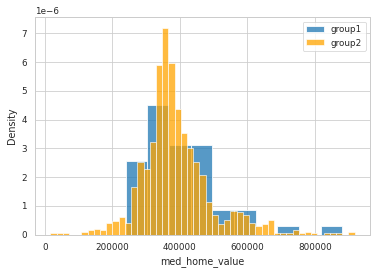

In [25]:
# what are the distributions of these two groups?
ax = sns.histplot(group1, label='group1', stat='density')
ax = sns.histplot(group2, label='group2', stat='density', color='orange', ax=ax)
l = ax.legend()

In [26]:
print(int(group1.mean()))
print(int(group2.mean()))

407850
388226


In [27]:
# calculate difference in means
group1.mean() - group2.mean()

19624.477793199185

The average majority-black tract's median home value is approx $20,000 higher than the average majority-hispanic tract's. That seems like a lot! But is it **statistically significant**? To determine this, we calculate the *t*-statistic and its *p*-value.

In [28]:
# compute the t-stat and its p-value
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
p_value = p_value / 2 #convert two-tailed p-value to one-tailed
print(t_statistic)
print(p_value) 

1.2072736450237291
0.1160893280434774


There is a 12% chance of getting a *t*-statistic at least this large (in a one-tailed *t*-test) just by random chance from sampling error. Notice that I converted my two-tailed p-value to a one-tailed p-value because my hypothesis is directional: it proposes that group 1's mean is greater than group 2's, rather than them just being unequal to each other.

A *t*-statistic is similar to a *z*-score in that it tells us how large some statistic is in relation to its standard error, using the *t*-distribution rather than the normal distribution. We use it to tell us how likely it is that we'd see a value of this magnitude just from random chance.

In [29]:
# is the difference in means statistically significant?
alpha = 0.05 #significance level
p_value < alpha

False

Remember my original hypothesis: "home values in majority black are higher than those in majority hispanic tracts." Let's express it formally in the parlance of statistical hypothesis testing:

  - H0: majority-black tract home values are not higher (null hypothesis)
  - H1: majority-black tract home values are higher (alternative hypothesis)

The two possible outcomes of a hypothesis test are 1) I reject the null hypothesis or 2) I cannot reject the null hypothesis.

My *p*-value is not less than the desired significance level, therefore I cannot reject the null hypothesis. You can only reject the null hypothesis if *p* is less than the significance level (which itself is an arbitrarily chosen probability threshold). Rejecting the null hypothesis does not mean that we've proven the alternative hypothesis, but rather just that it provides some evidence for this alternative. Remember Karl Popper and falsification.


  - **Type I Error** (false positive): reject the null hypothesis when it is true
  - **Type II Error** (false negative): fail to reject the null hypothesis when it is false

Our alpha value (significance level) is the Type I error rate that we are willing to accept. Essentially 1 in 20 times we will claim a significant difference just due to random chance. The beta value is the Type II error rate, and 1 - beta = your statistical power (probability of correctly rejecting the null hypothesis when the alternative hypothesis is true).

In [30]:
# now it's your turn
# what is the difference in mean tract-level median home values in majority white vs majority black tracts?
# is it statistically significant?
# what if you randomly sample just 25 tracts from each group: is their difference significant?
